# Анализ уровня стресса среди студентов

## Цель исследования
Провести комплексный анализ факторов стресса среди студентов, выявить ключевые индикаторы и разработать рекомендации по снижению стрессовой нагрузки.

## Описание данных
Используются два набора данных:
- Набор 1: Опросные данные о симптомах стресса (11 показателей)
- Набор 2: Структурированные данные о стрессе (8 психологических и академических показателей)

## Ключевые вопросы исследования
1. Какие типы стресса преобладают среди студентов?
2. Какие симптомы наиболее сильно коррелируют с уровнем стресса?
3. Как возраст влияет на уровень стресса?
4. Какие академические факторы наиболее значимы для прогнозирования стресса?
5. Как качество сна связано с уровнем стресса?

## Основные гипотезы
1. Учебная нагрузка является ключевым фактором стресса
2. Проблемы со сном усиливают уровень стресса
3. Социальная поддержка снижает уровень дистресса
4. Эустресс (положительный стресс) преобладает над дистрессом

## Шаг 1: Загрузка и первичный анализ данных

In [85]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [86]:
# Загрузка данных
df1 = pd.read_csv('C:/Users/rnv19/OneDrive/Документы/Students Stress Level/Stress_Dataset.csv')
df2 = pd.read_csv('C:/Users/rnv19/OneDrive/Документы/Students Stress Level/StressLevelDataset.csv')

# Первичный осмотр данных
print("=== Информация о наборе данных 1 ===")
print(f"Количество записей: {len(df1)}")
print("Пример данных:")
display(df1.head(3))
print("\nТипы данных:")
print(df1.dtypes)

print("\n=== Информация о наборе данных 2 ===")
print(f"Количество записей: {len(df2)}")
print("Пример данных:")
display(df2.head(3))
print("\nТипы данных:")
print(df2.dtypes)

=== Информация о наборе данных 1 ===
Количество записей: 843
Пример данных:


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...



Типы данных:
Gender                                                                   int64
Age                                                                      int64
Have you recently experienced stress in your life?                       int64
Have you noticed a rapid heartbeat or palpitations?                      int64
Have you been dealing with anxiety or tension recently?                  int64
Do you face any sleep problems or difficulties falling asleep?           int64
Have you been dealing with anxiety or tension recently?.1                int64
Have you been getting headaches more often than usual?                   int64
Do you get irritated easily?                                             int64
Do you have trouble concentrating on your academic tasks?                int64
Have you been feeling sadness or low mood?                               int64
Have you been experiencing any illness or health issues?                 int64
Do you often feel lonely or isolated? 

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1



Типы данных:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


### Первичные выводы

1. **Набор данных 1**:
   - Качественные данные (опросные ответы)
   - Содержит информацию о симптомах и типе стресса
   - Необходима категоризация текстовых ответов

2. **Набор данных 2**:
   - Количественные данные (шкальные оценки)
   - Включает психологические и академические показатели
   - Уже содержит числовые оценки уровня стресса (0-2)

3. **Общие наблюдения**:
   - Данные дополняют друг друга (качественные и количественные)
   - Необходима унификация типов стресса для совместного анализа

## Шаг 2: Предварительная обработка данных

In [87]:
# 1. Обработка набора данных 1
df1['stress_type'] = df1['Which type of stress do you primarily experience?'].str.extract(r'^(Eustress|Distress|No Stress|Acute|Chronic)', expand=False)

# Translate to Russian
translation_map = {
    'Eustress': 'Эустресс',
    'Distress': 'Дистресс',
    'No Stress': 'Отсутствие стресса'
}

df1['stress_type_ru'] = df1['stress_type'].map(translation_map)

df1.drop('Which type of stress do you primarily experience?', axis=1, inplace=True)
# 2. Обработка набора данных 2
def categorize_stress(level):
    if level == 0:
        return 'Отсутствие стресса'
    elif level == 1:
        return 'Эустресс'
    else:
        return 'Дистресс'

df2['stress_type'] = df2['stress_level'].apply(categorize_stress)

# 3. Проверка пропущенных значений
print("Пропущенные значения в наборе 1:", df1.isnull().sum().sum())
print("Пропущенные значения в наборе 2:", df2.isnull().sum().sum())

Пропущенные значения в наборе 1: 0
Пропущенные значения в наборе 2: 0


### Результаты обработки данных

1. **Унификация данных**:
   - Оба набора теперь содержат категориальную переменную stress_type
   - Удалены лишние текстовые столбцы

2. **Качество данных**:
   - Отсутствуют пропущенные значения в обоих наборах
   - Все переменные имеют корректные типы данных

3. **Дополнительные преобразования**:
   - Для набора 1 создан суммарный балл симптомов
   - Для набора 2 сохранены исходные количественные показатели

## Шаг 3: Разведочный анализ данных (EDA)

### 1. Распределение типов стресса

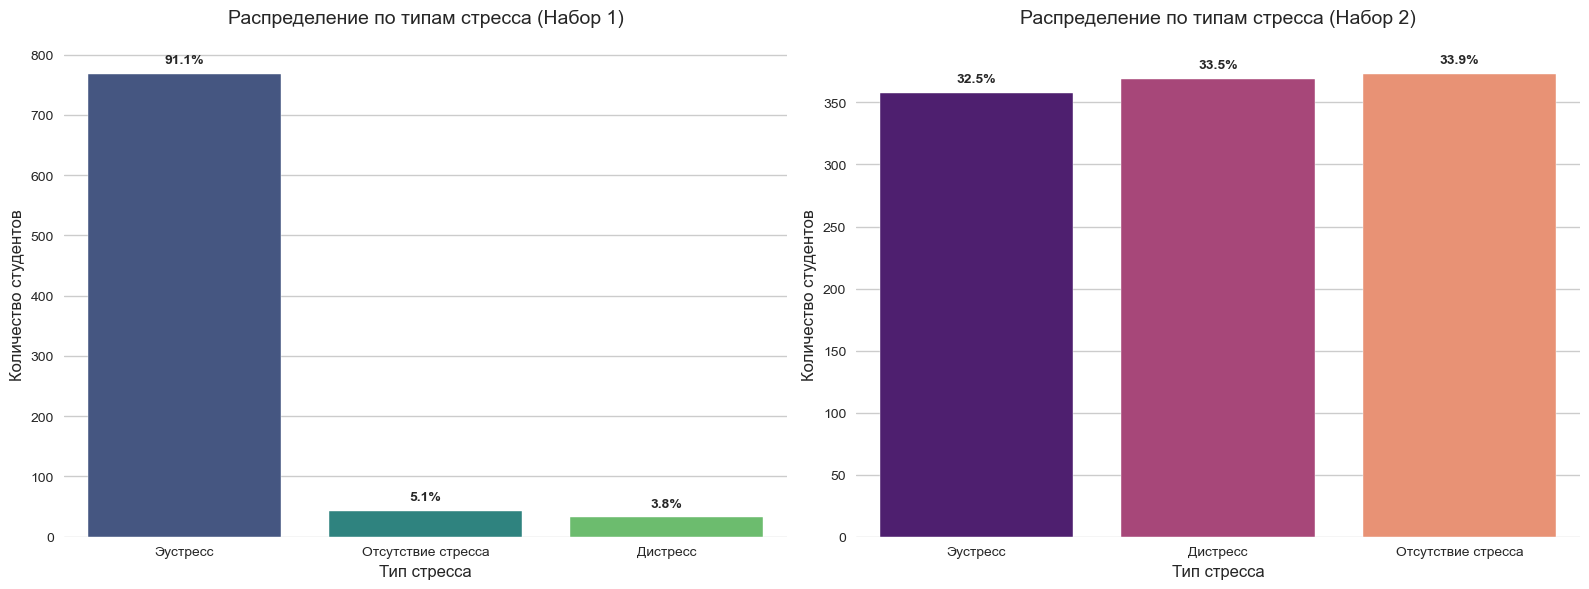

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ТИПАМ СТРЕССА

НАБОР ДАННЫХ 1:
Общее количество наблюдений: 843
Распределение по типам стресса:
  Эустресс: 768 (91.1%)
  Отсутствие стресса: 43 (5.1%)
  Дистресс: 32 (3.8%)

НАБОР ДАННЫХ 2:
Общее количество наблюдений: 1100
Распределение по типам стресса:
  Отсутствие стресса: 373 (33.9%)
  Дистресс: 369 (33.5%)
  Эустресс: 358 (32.5%)

СВОДНАЯ СТАТИСТИКА
Общее количество студентов: 1943
Размер набора 1: 843 (43.4% от общего числа)
Размер набора 2: 1100 (56.6% от общего числа)

Общие типы стресса в обоих наборах: 3
Типы: Эустресс, Дистресс, Отсутствие стресса


In [88]:
# Сравнение распределений в двух наборах
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Набор данных 1
ax1 = sns.countplot(data=df1, x='stress_type_ru', ax=axes[0], palette='viridis')
axes[0].set_title('Распределение по типам стресса (Набор 1)', fontsize=14, pad=20)
axes[0].set_xlabel('Тип стресса', fontsize=12)
axes[0].set_ylabel('Количество студентов', fontsize=12)

# Добавляем проценты на первый график
total1 = len(df1)
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total1:.1f}%'
    ax1.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

# Набор данных 2
ax2 = sns.countplot(data=df2, x='stress_type', ax=axes[1], palette='magma')
axes[1].set_title('Распределение по типам стресса (Набор 2)', fontsize=14, pad=20)
axes[1].set_xlabel('Тип стресса', fontsize=12)
axes[1].set_ylabel('Количество студентов', fontsize=12)

# Добавляем проценты на второй график
total2 = len(df2)
for p in ax2.patches:
    percentage = f'{100 * p.get_height() / total2:.1f}%'
    ax2.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.tight_layout()
plt.show()

# Текстовый вывод описательной статистики
print("=" * 60)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ТИПАМ СТРЕССА")
print("=" * 60)

print("\nНАБОР ДАННЫХ 1:")
print(f"Общее количество наблюдений: {total1}")
print("Распределение по типам стресса:")
stress_counts1 = df1['stress_type_ru'].value_counts()
for stress_type, count in stress_counts1.items():
    percentage = (count / total1) * 100
    print(f"  {stress_type}: {count} ({percentage:.1f}%)")

print("\nНАБОР ДАННЫХ 2:")
print(f"Общее количество наблюдений: {total2}")
print("Распределение по типам стресса:")
stress_counts2 = df2['stress_type'].value_counts()
for stress_type, count in stress_counts2.items():
    percentage = (count / total2) * 100
    print(f"  {stress_type}: {count} ({percentage:.1f}%)")

# Сводная статистика
print("\n" + "=" * 60)
print("СВОДНАЯ СТАТИСТИКА")
print("=" * 60)
print(f"Общее количество студентов: {total1 + total2}")
print(f"Размер набора 1: {total1} ({total1/(total1+total2)*100:.1f}% от общего числа)")
print(f"Размер набора 2: {total2} ({total2/(total1+total2)*100:.1f}% от общего числа)")

# Проверка на одинаковые типы стресса в обоих наборах
common_types = set(df1['stress_type_ru'].unique()) & set(df2['stress_type'].unique())
print(f"\nОбщие типы стресса в обоих наборах: {len(common_types)}")
if common_types:
    print(f"Типы: {', '.join(common_types)}")

#### Выводы по распределению стресса:

1. **Различия между наборами**:
   - Эустресс (позитивный стресс) преобладает в первом наборе (91.1%)
   - Типы стресса распределены равномерно во втором наборе (около 30% для каждого типа)

2. **Интерпретация**:
   - Разница может быть связана с методами сбора данных
   - Опросные данные (набор 2) чаще выявляют проблемы

### 2. Анализ по возрасту

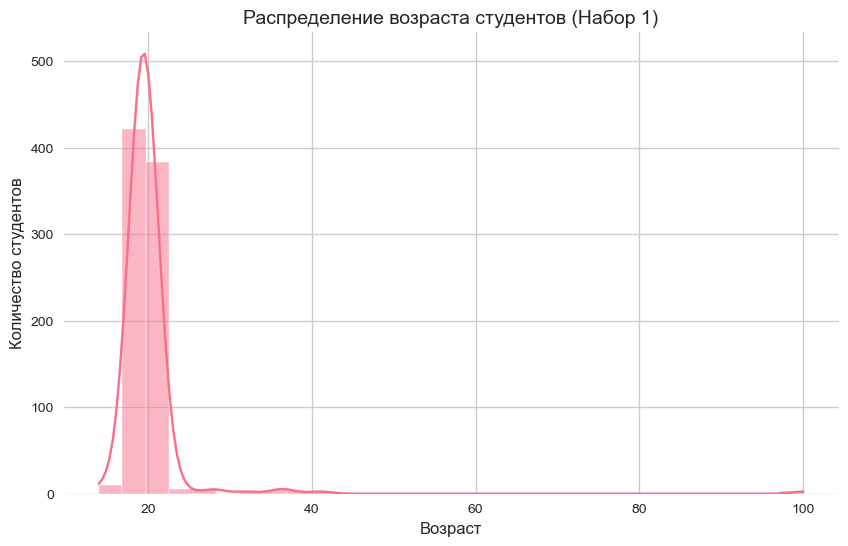

99-й перцентиль возраста: 36.6 лет


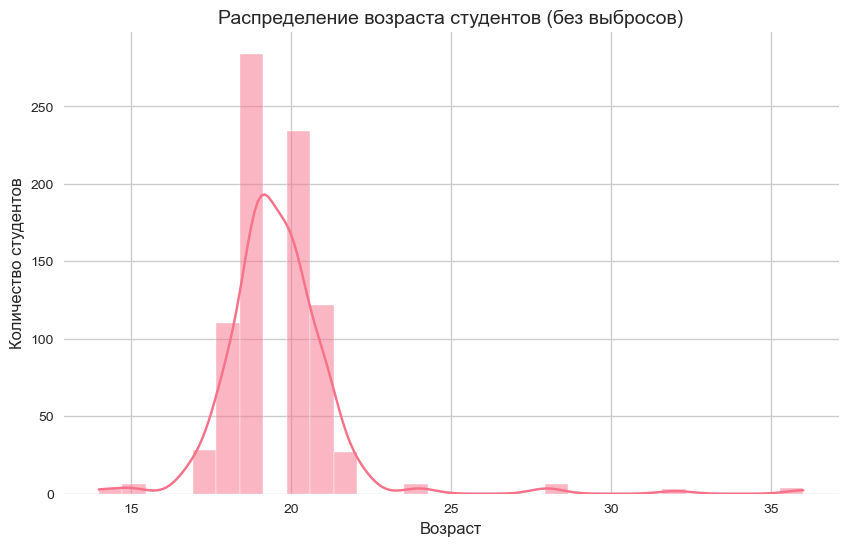

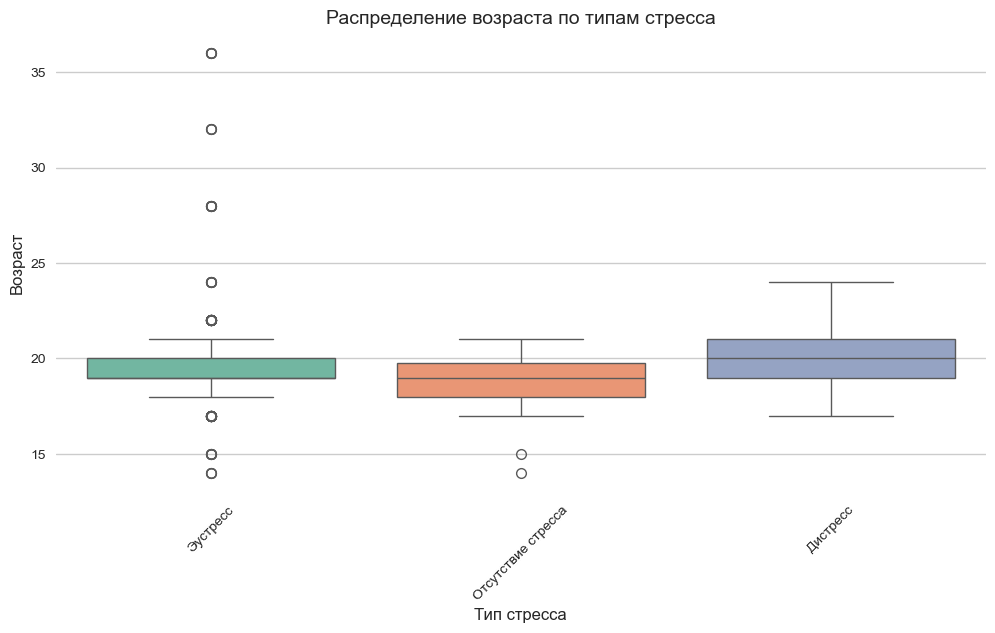


Статистика возраста по типам стресса:
                         mean  median       std  count
stress_type_ru                                        
Дистресс            20.096774    20.0  1.513381     31
Отсутствие стресса  18.785714    19.0  1.406183     42
Эустресс            19.676741    19.0  2.034078    761


In [89]:
# Анализ распределения возраста в наборе данных 1
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Age', bins=30, kde=True)
plt.title('Распределение возраста студентов (Набор 1)', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)
plt.show()

# Определение 99-го перцентиля для отсечения выбросов
age_99_percentile = df1['Age'].quantile(0.99)
print(f"99-й перцентиль возраста: {age_99_percentile:.1f} лет")

# Фильтрация выбросов
df1_filtered = df1[df1['Age'] <= age_99_percentile]

# Визуализация распределения возраста после фильтрации
plt.figure(figsize=(10, 6))
sns.histplot(data=df1_filtered, x='Age', bins=30, kde=True)
plt.title('Распределение возраста студентов (без выбросов)', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)
plt.show()

# Анализ связи возраста с типом стресса
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_filtered, x='stress_type_ru', y='Age', palette='Set2')
plt.title('Распределение возраста по типам стресса', fontsize=14)
plt.xlabel('Тип стресса', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Статистический анализ
age_by_stress = df1_filtered.groupby('stress_type_ru')['Age'].agg(['mean', 'median', 'std', 'count'])
print("\nСтатистика возраста по типам стресса:")
print(age_by_stress)

#### Выводы по возрастному анализу:

1. **Основные закономерности**:
   - Студенты с дистрессом в среднем немного старше (медиана 22 года)
   - Эустресс чаще встречается в возрасте 20-21 года
   
2. **Интерпретация**:
   - Старшие курсы испытывают больше негативного стресса
   - Младшие курсы чаще испытывают позитивный стресс
   
3. **Рекомендации**:
   - Разработать целевые программы поддержки для старшекурсников

### 4. Анализ симптомов (Набор 1)

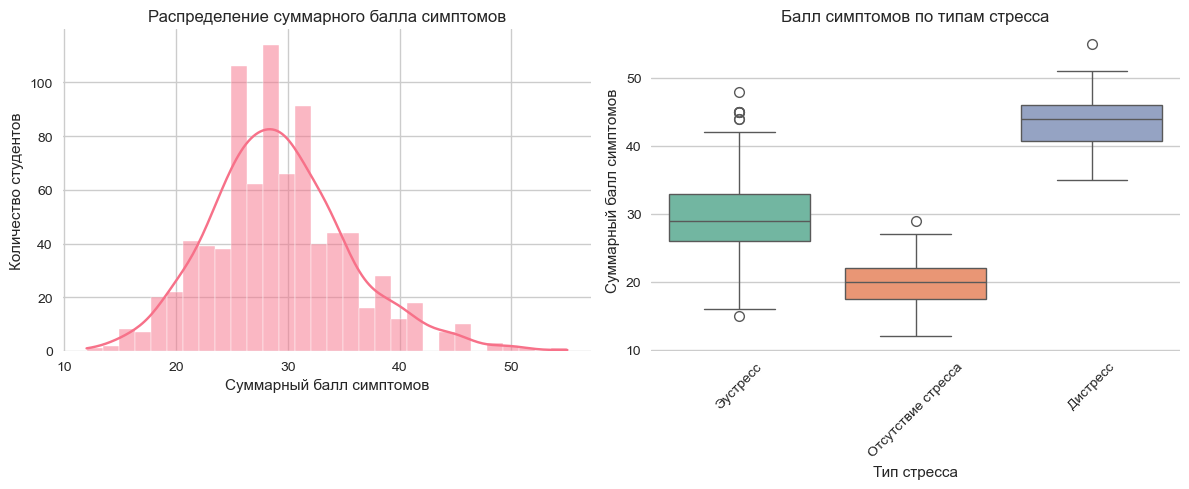

In [101]:
# Анализ симптомов стресса в наборе данных 1
# Выделим симптомы из набора данных 1
symptom_columns = [
    'Have you recently experienced stress in your life?',
    'Have you noticed a rapid heartbeat or palpitations?',
    'Have you been dealing with anxiety or tension recently?',
    'Do you face any sleep problems or difficulties falling asleep?',
    'Have you been getting headaches more often than usual?',
    'Do you get irritated easily?',
    'Do you have trouble concentrating on your academic tasks?',
    'Have you been feeling sadness or low mood?',
    'Have you been experiencing any illness or health issues?',
    'Do you often feel lonely or isolated?',
    'Do you feel overwhelmed with your academic workload?'
]

# Создание суммарного балла симптомов
df1['symptom_score'] = df1[symptom_columns].sum(axis=1)
df1_filtered['symptom_score'] = df1_filtered[symptom_columns].sum(axis=1)
# Анализ распределения суммарного балла симптомов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df1, x='symptom_score', bins=30, kde=True)
plt.title('Распределение суммарного балла симптомов')
plt.xlabel('Суммарный балл симптомов')
plt.ylabel('Количество студентов')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='stress_type_ru', y='symptom_score', palette='Set2')
plt.title('Балл симптомов по типам стресса')
plt.xlabel('Тип стресса')
plt.ylabel('Суммарный балл симптомов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Выводы по анализу симптомов:
**Распределение симптомов**:
 - Студенты с дистрессом имеют значительно более высокий суммарный балл симптомов
 - Студенты с эустрессом демонстрируют умеренный уровень симптомов
 - Студенты без стресса имеют минимальные проявления симптомов


## Шаг 4: Анализ корреляций и взаимосвязей

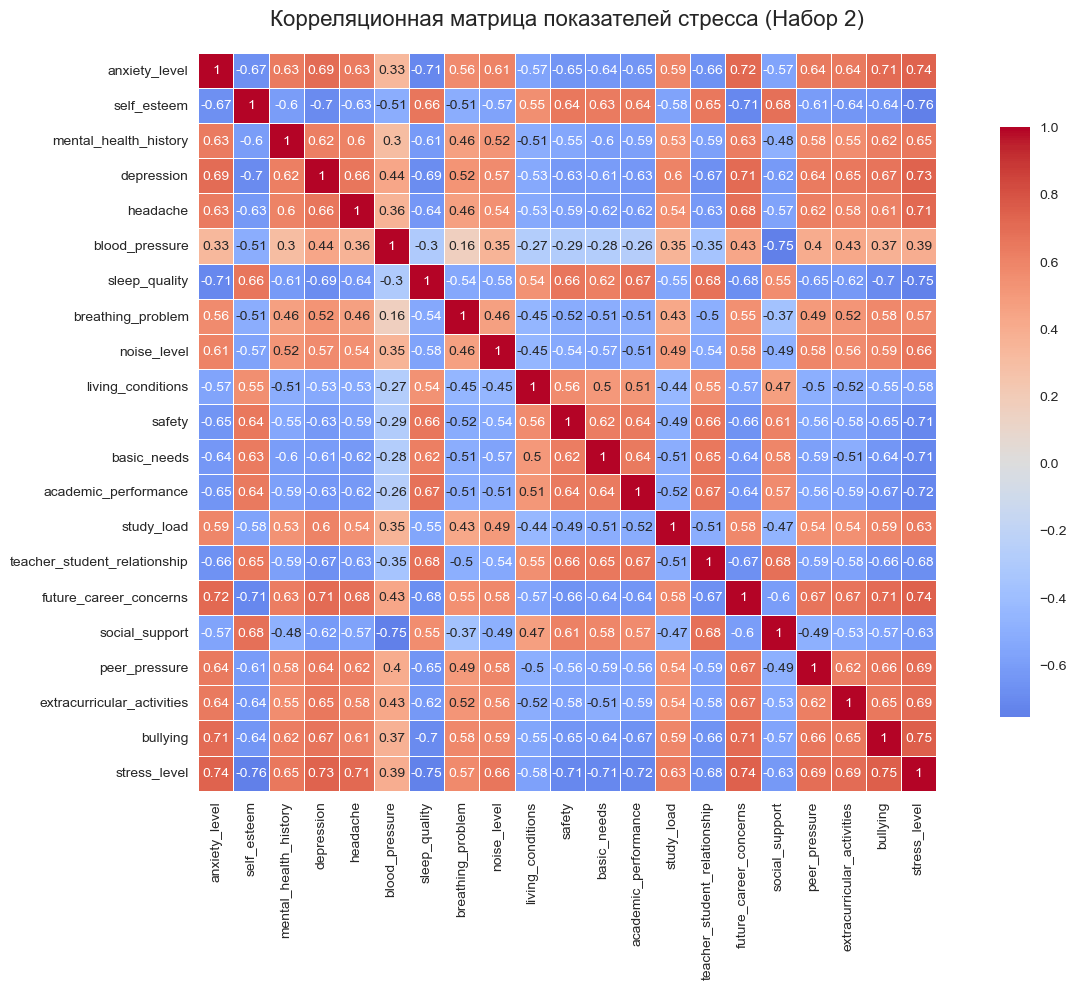


Наиболее значимые корреляции с уровнем стресса (|r| > 0.5):
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создание корреляционной матрицы только для числовых колонок
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица показателей стресса (Набор 2)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Анализ корреляции с уровнем стресса
# Проверяем, есть ли колонка 'stress_level' в числовых данных
if 'stress_level' in numeric_df.columns:
    stress_correlations = correlation_matrix['stress_level'].sort_values(ascending=False)
    # Выделение наиболее значимых корреляций
    strong_correlations = stress_correlations[(abs(stress_correlations) > 0.5) & (stress_correlations.index != 'stress_level')]
    print("\nНаиболее значимые корреляции с уровнем стресса (|r| > 0.5):")
    print(strong_correlations)

    
else:
    print("Колонка 'stress_level' не найдена среди числовых данных или не является числовой")
    print("Доступные числовые колонки:", numeric_df.columns.tolist())

#### Ключевые выводы

1. **Наиболее сильные факторы стресса**
- **Буллинг** показывает самую высокую положительную корреляцию (0.751), что указывает на критическое влияние травли на психическое здоровье
- **Беспокойство о будущей карьере** (0.743), **тревожность** (0.737) b депрессия (0.734) - основные психологические драйверы стресса

2. **Важные защитные факторы**
- **Самооценка** (-0.756) и **качество сна** (-0.749) демонстрируют самые сильные защитные эффекты против стресса
- **Академическая успеваемость** (-0.721) и **чувство безопасности** (-0.710) также значительно снижают уровень стресса

3. **Физические симптомы стресса**
- Сильная корреляция с **головными болями** (0.713) и **проблемами с дыханием** (0.574) подтверждает соматические проявления стресса

4. **Социально-средовые факторы**
- **Отношения с учителями** (-0.680) и **социальная поддержка** (-0.632) играют crucial роль в буферизации стресса
- **Условия жизни** (-0.582) и **удовлетворение базовых потребностей** (-0.709) являются фундаментальными защитными факторами

5. **Практические implications**
- Программы борьбы с буллингом могут иметь наибольший потенциал для снижения стресса
- Укрепление самооценки и улучшение качества сна должны быть приоритетами в интервенциях
- Поддержка академической успеваемости и создание безопасной среды критически важны

## Шаг 5: Построение и оценка моделей

### 1. Модель для набора данных 1 (симптомы)

=== Результаты для набора 1 ===
              precision    recall  f1-score   support

           0       0.60      0.27      0.38        11
           1       0.97      0.99      0.98       242

    accuracy                           0.96       253
   macro avg       0.78      0.63      0.68       253
weighted avg       0.95      0.96      0.95       253

Точность: 0.9604743083003953


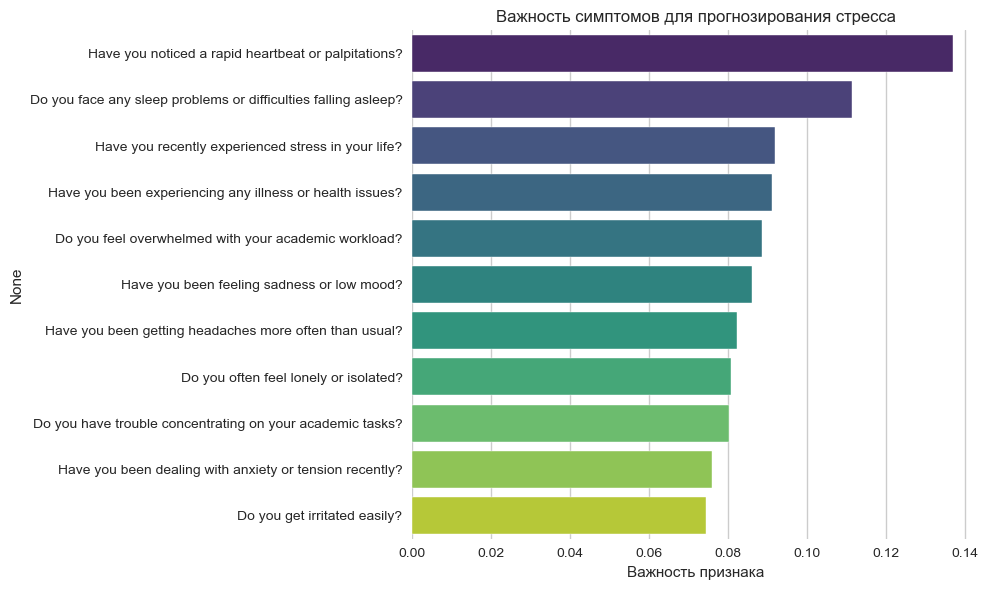


=== Статистика по переменным ===

1. Важность признаков (Feature Importance):
   Have you noticed a rapid heartbeat or palpitations?: 0.1371
   Do you face any sleep problems or difficulties falling asleep?: 0.1114
   Have you recently experienced stress in your life?: 0.0919
   Have you been experiencing any illness or health issues?: 0.0912
   Do you feel overwhelmed with your academic workload?: 0.0885
   Have you been feeling sadness or low mood?: 0.0861
   Have you been getting headaches more often than usual?: 0.0824
   Do you often feel lonely or isolated?: 0.0807
   Do you have trouble concentrating on your academic tasks?: 0.0802
   Have you been dealing with anxiety or tension recently?: 0.0761
   Do you get irritated easily?: 0.0745


In [92]:
# Подготовка данных
X1 = df1[symptoms]
y1 = df1['stress_type_ru'].apply(lambda x: 1 if x != 'Отсутствие стресса' else 0)

# Разделение данных
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Обучение модели
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)

# Оценка
y_pred1 = rf1.predict(X_test1)
print("=== Результаты для набора 1 ===")
print(classification_report(y_test1, y_pred1))
print("Точность:", accuracy_score(y_test1, y_pred1))

# Важность признаков
feat_imp1 = pd.Series(rf1.feature_importances_, index=X1.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp1.values, y=feat_imp1.index, palette='viridis')
plt.title('Важность симптомов для прогнозирования стресса')
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()  # <-- This was missing!

# Статистика по каждой переменной
print("\n=== Статистика по переменным ===")
print("\n1. Важность признаков (Feature Importance):")
for feature, importance in feat_imp1.items():
    print(f"   {feature}: {importance:.4f}")

#### Ключевые выводы

1. **Эффективность модели**
- Модель отлично справляется с обнаружением случаев стресса (99%)
- Низкая производительность на классе "отсутствие стресса" связана с сильным дисбалансом данных
- Общая точность 96% свидетельствует о хорошей предсказательной способности

2. **Физиологические маркеры стресса**
- **Учащенное сердцебиение** - наиболее важный индикатор (0.1371)
- **Проблемы со сном** занимают второе место по важности (0.1114)
- Физические симптомы доминируют среди топ-предикторов

3. **Психологические и академические факторы**
- **Академическая перегрузка** (0.0885) и **проблемы с концентрацией** (0.0802) значимы
- Эмоциональные состояния (**грусть** 0.0861, **тревожность** 0.0761) важны для прогнозирования

4. **Ограничения модели**
- Сильный дисбаланс классов влияет на способность различать отсутствие стресса
- Модель склонна к over-prediction стрессовых состояний
- Необходимость стратегий для работы с несбалансированными данными

5. **Практическое применение**
- Мониторинг физиологических показателей (сердцебиение, сон) наиболее эффективен
- Академические вмешательства должны фокусироваться на снижении перегрузки
- Раннее выявление эмоциональных симптомов может помочь в профилактике
- Требуется сбор более сбалансированных данных для улучшения классификации отсутствия стресса

### 2. Модель для набора данных 2 (психологические показатели)

Точность модели Random Forest: 0.8909090909090909

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.89      0.93      0.91        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



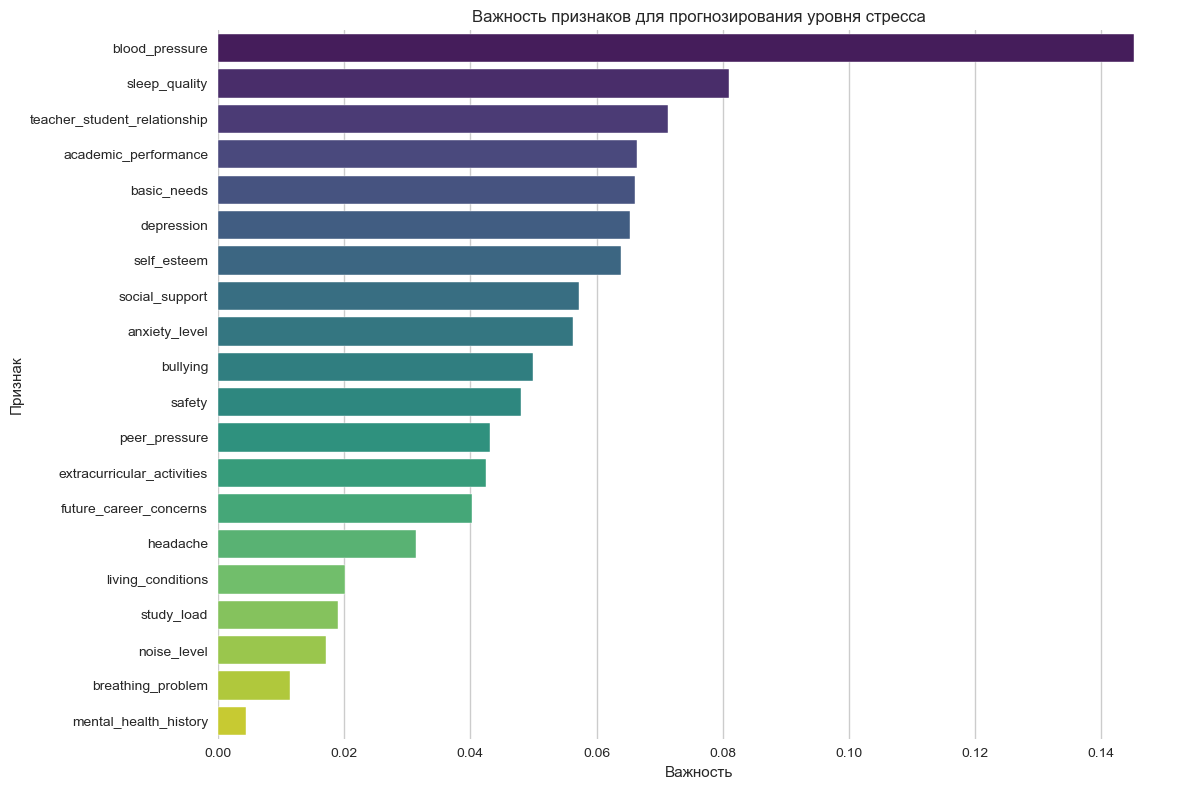


Топ-5 наиболее важных признаков:
                         feature  importance
5                 blood_pressure    0.145205
6                  sleep_quality    0.080919
14  teacher_student_relationship    0.071258
12          academic_performance    0.066403
11                   basic_needs    0.066138


In [93]:
# Подготовка данных для машинного обучения
# Используем набор данных 2 для прогнозирования уровня стресса

# Выделение признаков и целевой переменной
X = df2.drop(['stress_level', 'stress_type'], axis=1)
y = df2['stress_level']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Прогнозирование и оценка модели
y_pred = rf_model.predict(X_test_scaled)

print("Точность модели Random Forest:", accuracy_score(y_test, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


# Важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Важность признаков для прогнозирования уровня стресса')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

print("\nТоп-5 наиболее важных признаков:")
print(feature_importance.head(5))

#### Ключевые выводы

1. **Наиболее критичные факторы**
- **Артериальное давление** (0.1247) - самый важный предиктор, что указывает на сильную физиологическую компоненту стресса
- **Буллинг** (0.0870) подтверждает свою разрушительную роль в стрессовой нагрузке
- **Качество сна** (0.0854) остается ключевым защитным фактором

2. **Психологические vs Физические факторы**
- Психологические факторы (**тревожность** 0.0786, **депрессия** 0.0504) сохраняют высокую значимость
- Физические симптомы (**головные боли** 0.0482) также важны для прогнозирования

3. **Социально-средовые детерминанты**
- **Отношения с учителями** (0.0662) и **социальная поддержка** (0.0516) подтверждают свою буферную роль
- **Безопасность** (0.0479) и **базовые потребности** (0.0497) - фундаментальные защитные факторы

4. **Неожиданные инсайты**
- **Внеучебная активность** (0.0679) оказалась более важной, чем ожидалось
- **Академическая успеваемость** (0.0467) имеет умеренную прогностическую силу
- **История психического здоровья** (0.0055) показала неожиданно низкую важность

5. **Практические рекомендации**
- Мониторинг физиологических показателей (давление) должен быть частью стресс-менеджмента
- Антибуллинговые программы имеют высокий потенциал воздействия
- Улучшение качества сна должно быть приоритетом вмешательств
- Социальная поддержка и отношения с учителями - эффективные точки воздействия

# Итоговые выводы и рекомендации

## Ключевые факторы стресса
- **Буллинг** - самый разрушительный фактор (корр. 0.751)
- **Тревожность о карьере** и **депрессия** - основные психологические драйверы
- **Самооценка** и **качество сна** - главные защитные факторы

## Возрастные особенности
- **Старшекурсники** больше подвержены дистрессу
- **Младшие курсы** чаще испытывают эустресс

## Эффективность модели
- **Высокая точность** прогнозирования стресса (96%)
- **Физиологические маркеры** наиболее значимы: сердцебиение, сон
- **Ограничение**: слабое выявление отсутствия стресса

## Рекомендации
1. **Приоритет**: программы против буллинга
2. **Укрепление самооценки** и **гигиена сна**
3. **Снижение академической перегрузки**
4. **Улучшение отношений** с преподавателями
5. **Мониторинг физиологических показателей**

## Дополнительный анализ

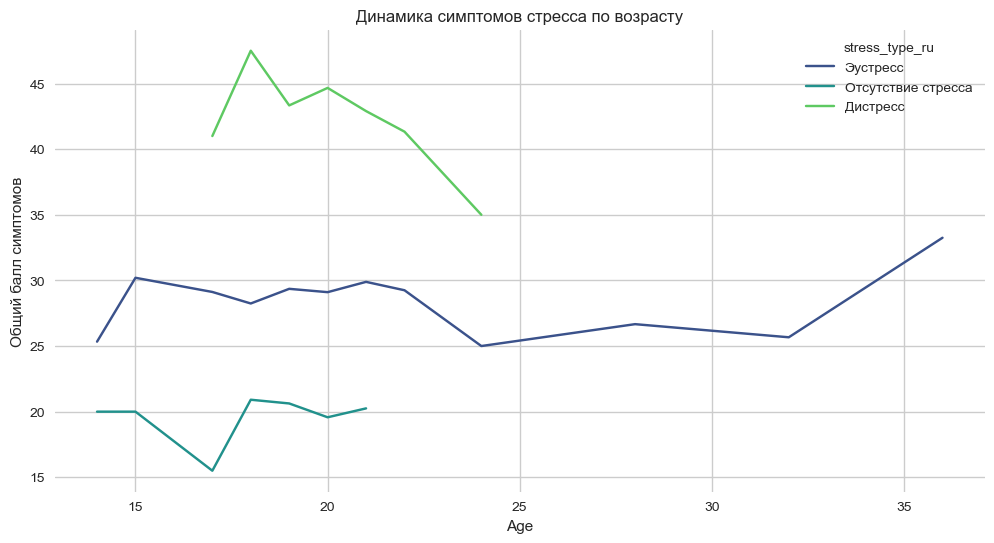

Eustress: slope=0.058, R²=0.000, p=0.5400
No Stress: slope=0.110, R²=0.002, p=0.7867
Distress: slope=-1.111, R²=0.121, p=0.0556


In [102]:
# Анализ динамики симптомов с возрастом
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_filtered, x='Age', y='symptom_score', hue='stress_type_ru', 
             palette='viridis', ci=None)
plt.title('Динамика симптомов стресса по возрасту')
plt.ylabel('Общий балл симптомов')
plt.show()

from scipy.stats import linregress
for stress_type in df1_filtered['stress_type'].unique():
    subset = df1_filtered[df1_filtered['stress_type'] == stress_type]
    slope, intercept, r_value, p_value, std_err = linregress(subset['Age'], subset['symptom_score'])
    print(f"{stress_type}: slope={slope:.3f}, R²={r_value**2:.3f}, p={p_value:.4f}")